In [1]:
import string

class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

vectorizer = Vectorizer()
text = "This is a test sentence to put through my python code"
vectorizer.make_vocabulary(text)

result = vectorizer.tokenize(text)

#result = tokenize(text)
print(result)

['this', 'is', 'a', 'test', 'sentence', 'to', 'put', 'through', 'my', 'python', 'code']


In [2]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)
print(encoded_sentence)

[4, 1, 1, 1, 1, 1, 1]


In [4]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    output_mode="int",
)

In [5]:
import re
import string
import tensorflow as tf

def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor)
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "")

def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor)

text_vectorization = TextVectorization(
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)

In [9]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="multi_hot",
)

In [21]:
#Implement an `ngram` function that splits tokens into N-grams. 

#```python
def ngram(token, n):
    ngrams = []
    text_vectorization(token)
    return ngrams

text_vectorization = TextVectorization(
    ngrams=3,
    max_tokens=20000,
    output_mode="multi_hot",
)

ngram(result,3)

RuntimeError: Exception encountered when calling layer "string_lookup_16" (type StringLookup).

When using `output_mode=multi_hot` and `pad_to_max_tokens=False`, you must set the layer's vocabulary before calling it. Either pass a `vocabulary` argument to the layer, or call `adapt` with some sample data.

Call arguments received by layer "string_lookup_16" (type StringLookup):
  • inputs=<tf.RaggedTensor [[b'this'],
 [b'is'],
 [b'a'],
 [b'test'],
 [b'sentence'],
 [b'to'],
 [b'put'],
 [b'through'],
 [b'my'],
 [b'python'],
 [b'code']]>

In [33]:
from nltk import word_tokenize 
from nltk.util import ngrams

text = ["This is a test sentence to put through my python code"]

for line in text:
    token = word_tokenize(line)
    bigram = list(ngrams(token, 2))

print(bigram)

[('This', 'is'), ('is', 'a'), ('a', 'test'), ('test', 'sentence'), ('sentence', 'to'), ('to', 'put'), ('put', 'through'), ('through', 'my'), ('my', 'python'), ('python', 'code')]


In [35]:
import numpy as np
samples = ["This is a test sentence to put through my python code"]
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10
results = np.zeros(shape=(len(samples),
    max_length,
    max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1
        
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]]


In [53]:
from keras.layers import Embedding
#embedding_layer = Embedding(1000, 64)

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [56]:
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

AttributeError: module 'keras.preprocessing.sequence' has no attribute 'pad_sequences'

In [82]:
#From 6.8

import os
imdb_dir = 'C:\\Users\\Kate\\Documents\\GitHub\\dsc650\\data\\external\\imdb\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

#From 6.9
from keras_preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [83]:
from keras_preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Found 0 unique tokens.
Shape of data tensor: (0, 100)
Shape of label tensor: (0,)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_11 (Flatten)        (None, 10000)             0         
                                                                 
 dense_22 (Dense)            (None, 32)                320032    
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

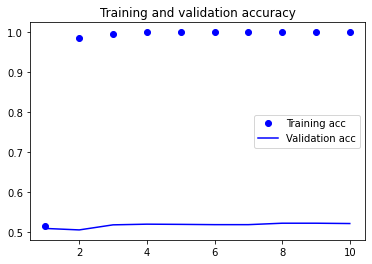

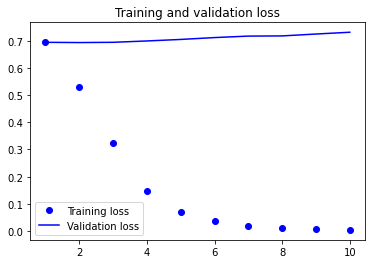

In [84]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [71]:
import os
imdb_dir = 'C:\\Users\\Kate\\Documents\\GitHub\\dsc650\\data\\external\\imdb\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [72]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'pre_trained_glove_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [87]:
from keras.datasets import imdb
from keras_preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [88]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 83s 502ms/step - loss: 0.5258 - acc: 0.7528 - val_loss: 0.3589 - val_acc: 0.8500
Epoch 2/10
157/157 [==============================] - 69s 439ms/step - loss: 0.2955 - acc: 0.8822 - val_loss: 0.4785 - val_acc: 0.8296
Epoch 3/10
157/157 [==============================] - 79s 505ms/step - loss: 0.2344 - acc: 0.9121 - val_loss: 0.2998 - val_acc: 0.8780
Epoch 4/10
157/157 [==============================] - 80s 509ms/step - loss: 0.2029 - acc: 0.9242 - val_loss: 0.2869 - val_acc: 0.8876
Epoch 5/10
157/157 [==============================] - 80s 509ms/step - loss: 0.1791 - acc: 0.9352 - val_loss: 0.4870 - val_acc: 0.8018
Epoch 6/10
157/157 [==============================] - 79s 504ms/step - loss: 0.1643 - acc: 0.9413 - val_loss: 0.7795 - val_acc: 0.7558
Epoch 7/10
157/157 [==============================] - 79s 506ms/step - loss: 0.1464 - acc: 0.9483 - val_loss: 0.3804 - val_acc: 0.8676
Epoch 8/10
157/157 [==============================] - 8

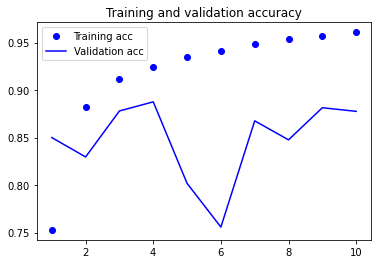

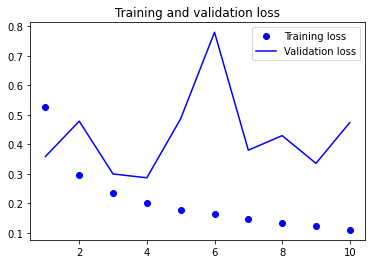

In [90]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()